We will build a neural net to classify heartbeats into 1 of 5 options from their ECG

In [ ]:
# import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# We can upload the heartbeat data over 187 milliseconds for different people
# The target it 187 column
# The training data has over 85,000 rows so a lot of data!
test_data = pd.read_csv('/content/drive/My Drive/DL, CV and NLP/mitbih_test.csv', header = None)
train_data = pd.read_csv('/content/drive/My Drive/DL, CV and NLP/mitbih_train.csv', header = None)

In [ ]:
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,0.052632,0.140351,0.119298,0.091228,0.140351,0.161404,0.105263,0.143860,0.143860,0.129825,0.147368,0.157895,0.164912,0.168421,0.154386,0.175439,0.164912,0.154386,0.182456,0.192982,0.196491,0.207018,0.217544,0.217544,0.256140,0.284211,0.294737,0.301754,0.301754,0.322807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,0.078333,0.183333,0.275000,0.315000,0.361667,0.430000,0.481667,0.526667,0.543333,0.563333,0.581667,0.588333,0.600000,0.603333,0.613333,0.6216

An Electro Cardio Gram (ECG) is a simple test that can be used to check your heart rhythm and electric activity.

* Classes = {N:0, S:1, V:2, F:3, Q:4}
* N: Non-ectopic beats (Normal Beats), - S: Supraventricular ectopic beats , V - Ventricular ectopic beats, F - Fusion Beats , Q - Unknown Beats


**Data Manipulation**

We first look for missing values



In [ ]:
# We can check the total number of missing values by summing twice
train_data.isnull().sum().sum()
# We find that there are no null values and so we are good

0

We check for the number of unique values

In [ ]:
train_data[187].unique()
# There are 5 unique values corresponding to the different diagnoses

array([0., 1., 2., 3., 4.])

In [ ]:
# Let us convert it to integers
train_data[187] = train_data[187].astype(int)
# We can do the same with test
test_data[187] =test_data[187].astype(int)

**Exploratory Data Analysis**

We also need to check that all of the class types appear with roughly the same frequency. This is to ensure our NN trains well for all classes

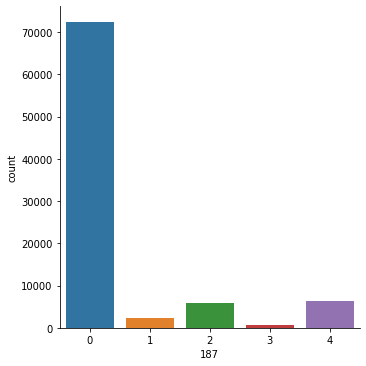

In [ ]:
# Total count of the samples present in each class 'x'
sns.catplot(x = 187, kind = 'count', data = train_data)
# Our data is highly biased towards class 0
# The NN will just assign everything to 0 to get a good accuracy
# This is not good

In [ ]:
# We can check the exact counts with
train_data[187].value_counts()

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

**Pie Chart**

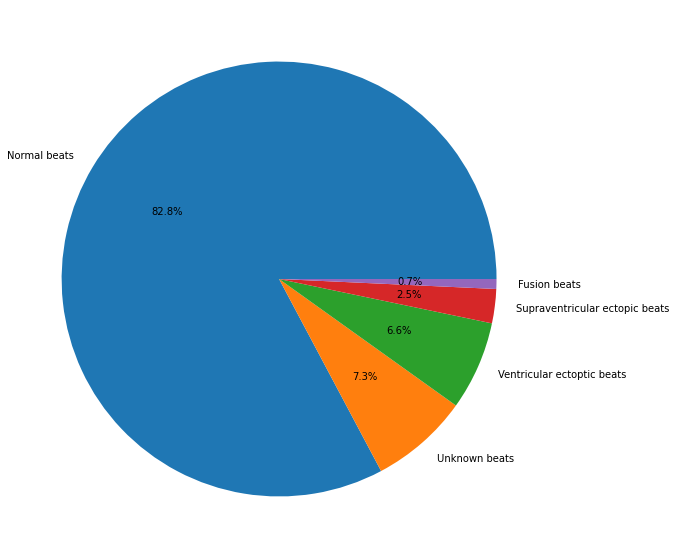

In [ ]:
plt.figure(figsize = (10,10))
plt.pie(train_data[187].value_counts(), labels = ['Normal beats',
                                                  'Unknown beats',
                                                  'Ventricular ectoptic beats',
                                                  'Supraventricular ectopic beats',
                                                  'Fusion beats'], autopct = '%1.1f%%')
plt.show()

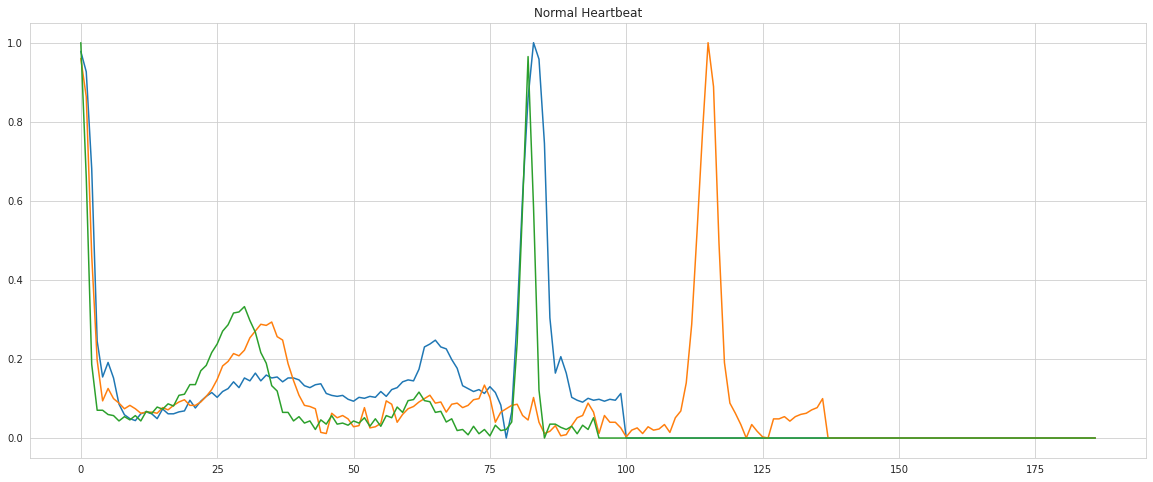

In [ ]:
# We can visualise a normal heartbeat
sns.set_style('whitegrid')
plt.figure(figsize = (20,8))
plt.plot(train_data.iloc[0,0:187])
plt.plot(train_data.iloc[1,0:187])
plt.plot(train_data.iloc[2,0:187])
plt.title('Normal Heartbeat')
plt.show()

In [ ]:
# We can slice the data to select only the separate classes
df_0 = train_data[train_data[187] == 0]
df_1 = train_data[train_data[187] == 1]
df_2 = train_data[train_data[187] == 2]
df_3 = train_data[train_data[187] == 3]
df_4 = train_data[train_data[187] == 4]

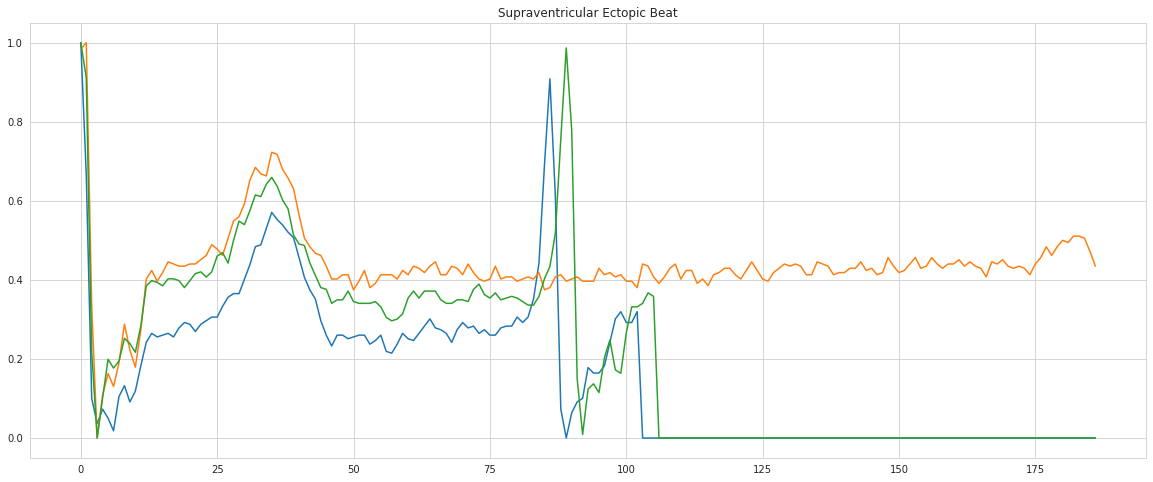

In [ ]:
# We can visualise some of the bad heartbeats as well
sns.set_style('whitegrid')
plt.figure(figsize = (20,8))
plt.plot(df_1.iloc[0,0:187])
plt.plot(df_1.iloc[1,0:187])
plt.plot(df_1.iloc[2,0:187])
plt.title('Supraventricular Ectopic Beat')
plt.show()

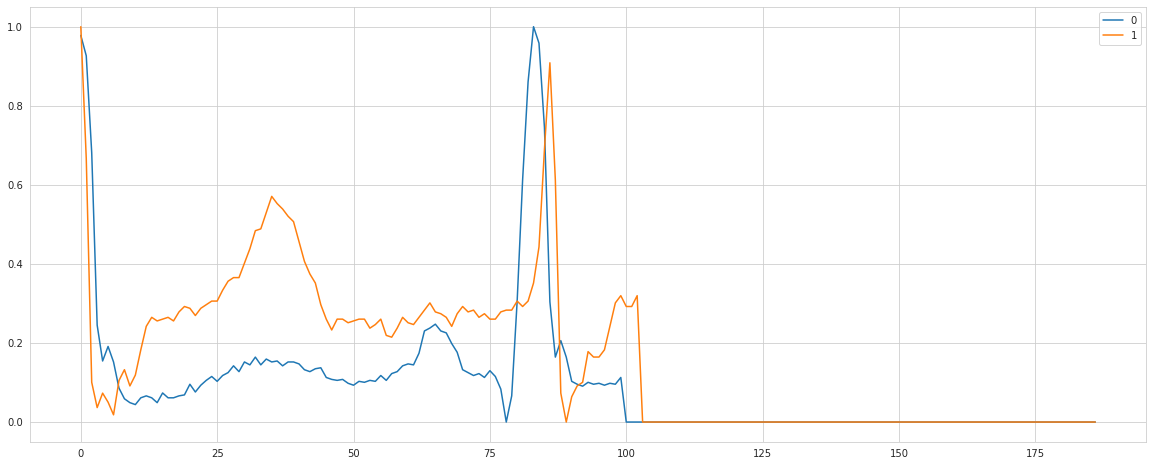

In [ ]:
# We can compare them with a normal heartbeat on the same plot
sns.set_style('whitegrid')
plt.figure(figsize = (20,8))
plt.plot(train_data.iloc[0,0:187], label = '0')
plt.plot(df_1.iloc[0,0:187], label = '1')
plt.legend()
plt.show()

In [ ]:
# We can solve the bias problem by 'up-sampling' the data
# It is also called bootstrapping
# We make multiple copies of the data and shuffle them in randomly
from sklearn.utils import resample

df_1_upsample = resample(df_1, n_samples = 20000, replace = True, random_state = 123)
df_2_upsample = resample(df_2, n_samples = 20000, replace = True, random_state = 123)
df_3_upsample = resample(df_3, n_samples = 20000, replace = True, random_state = 123)
df_4_upsample = resample(df_4, n_samples = 20000, replace = True, random_state = 123)

In [ ]:
# We also want to select 20000 samples from df_0
# We will replace df_0 with the sample
df_0 = train_data[train_data[187] == 0].sample(n=20000, random_state = 123)

In [ ]:
train_df = pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])
train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
14967,1.000000,0.647702,0.039387,0.004376,0.102845,0.063457,0.067834,0.048140,0.045952,0.045952,0.039387,0.037199,0.043764,0.043764,0.050328,0.048140,0.048140,0.054705,0.063457,0.059081,0.080963,0.087527,0.107221,0.120350,0.140044,0.157549,0.181619,0.196937,0.218818,0.227571,0.256018,0.260394,0.260394,0.256018,0.247265,0.223195,0.205689,0.175055,0.157549,0.142232,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
71482,1.000000,0.946619,0.651246,0.330961,0.000000,0.067616,0.092527,0.163701,0.192171,0.177936,0.181495,0.170819,0.163701,0.170819,0.153025,0.153025,0.138790,0.142349,0.142349,0.145907,0.135231,0.138790,0.145907,0.156584,0.156584,0.163701,0.160142,0.181495,0.181495,0.195730,0.224199,0.231317,0.238434,0.252669,0.263345,0.277580,0.288256,0.306050,0.302491,0.330961,...,0.131673,0.174377,0.185053,0.185053,0.174377,0.185053,0.185053,0.181495,0.16726,0.170819,0.145907,0.156584,0.153025,0.16726,0.160142,0.160142,0.163701,0.170819,0.16726,0.177936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23543,1.000000,0.855967,0.302469,0.041152,0.185185,0.160494,0.098765,0.092593,0.109053,0.088477,0.076132,0.084362,0.092593,0.074074,0.076132,0.076132,0.082305,0.080247,0.078189,0.082305,0.094650,0.092593,0.086420,0.106996,0.117284,0.119342,0.121399,0.144033,0.158436,0.170782,0.179012,0.207819,0.232510,0.240741,0.255144,0.281893,0.300412,0.302469,0.302469,0.308642,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9174,1.000000,0.838806,0.738806,0.641791,0.604478,0.583582,0.580597,0.580597,0.591045,0.577612,0.571642,0.540299,0.519403,0.511940,0.520896,0.504478,0.491045,0.462687,0.449254,0.428358,0.423881,0.449254,0.477612,0.528358,0.555224,0.570149,0.610448,0.638806,0.668657,0.686567,0.702985,0.713433,0.702985,0.676119,0.670149,0.653731,0.635821,0.625373,0.594030,0.588060,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
42319,1.000000,0.720257,0.019293,0.106109,0.073955,0.086817,0.070740,0.077170,0.070740,0.083601,0.057878,0.077170,0.064309,0.083601,0.073955,0.080386,0.073955,0.083601,0.070740,0.077170,0.070740,0.083601,0.067524,0.080386,0.067524,0.080386,0.061093,0.067524,0.051447,0.061093,0.057878,0.073955,0.067524,0.093248,0.099678,0.135048,0.135048,0.163987,0.154341,0.163987,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86326,0.979769,0.765896,0.820809,0.274566,0.170520,0.150289,0.150289,0.147399,0.135838,0.130058,0.124277,0.118497,0.112717,0.104046,0.101156,0.083815,0.083815,0.069364,0.066474,0.057803,0.054913,0.037572,0.031792,0.028902,0.017341,0.017341,0.011561,0.000000,0.008671,0.0057

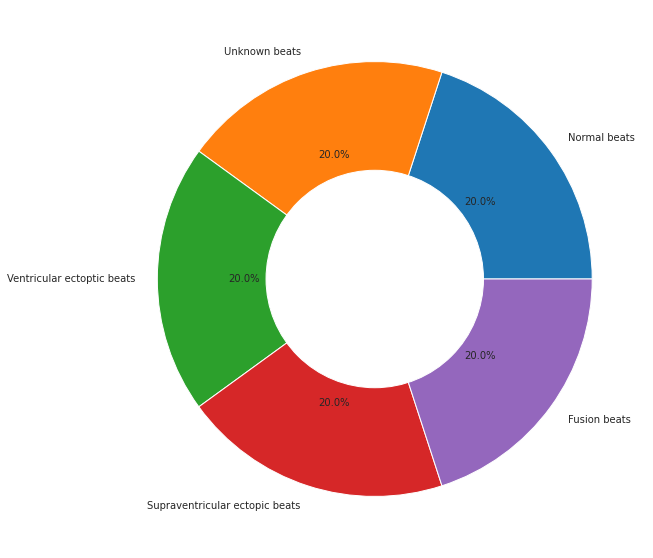

In [ ]:
# We can check the bias again
my_circle = plt.Circle((0,0), 0.5, color = 'white')
plt.figure(figsize = (10,10))
plt.pie(train_df[187].value_counts(), labels = ['Normal beats',
                                                  'Unknown beats',
                                                  'Ventricular ectoptic beats',
                                                  'Supraventricular ectopic beats',
                                                  'Fusion beats'], autopct = '%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
train_target = train_df[187]
test_target = test_data[187]

In [ ]:
# We need to change this output data to categorical
from keras.utils.np_utils import to_categorical
y_train = to_categorical(train_target)
y_test = to_categorical(test_target)

**Features and Labels**

In [ ]:
# Let's peel of the features
X_train = train_df.iloc[:,:-1].values
X_test = test_data.iloc[:,:-1].values

In [ ]:
X_train.shape

(100000, 187)

In [ ]:
X_test.shape
# Note that this is roughly in the 4:1 ratio needed for train:test
# This is why we chose to have 100,000 train samples

(21892, 187)

**ANN Classification**

In [ ]:
# We can build a dense layer in the NN
# We need further imports
from keras.layers import Dense
from keras.models import Sequential # RNNs + RBMs are not sequential
from keras.optimizers import Adam

In [ ]:
def build_model():
  model = Sequential() # model is a variable here

  # Imput - laye
  # .add(...) adds a new layer and links it to the previous one
  # We choose 
  model.add(Dense(units = 64,           # We often want 2^n nodes
                  activation = 'relu',
                  input_shape = [187])
            )
  
  # Hidden Layer 1
  model.add(Dense(units = 128,
                  activation = 'relu'))
  # Hidden Layer 2
  model.add(Dense(units = 128,
                  activation = 'relu'))

  # Output layer
  model.add(Dense(units = 5,
            activation = 'softmax'))           

  # Let's build our optimizer
  # By default, the learning rate alpha = 0.001
  optimizers = Adam(learning_rate = 0.001)

  # We need to compile the NN
  model.compile(loss = 'categorical_crossentropy',
                optimizer = optimizers,  # Could also choose SGD
                metrics = ['accuracy'])
  
  # We need to return the model
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                12032     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 645       
Total params: 37,509
Trainable params: 37,509
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# We now want to train the NN
# Epochs = # of iterations
# Batch size = small sample / batch sample taken for iterations in every epoch
# validation_split = n% of overall data from training dataset for validation

history = model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/50
3125/3125 [==============================] - 11s 3ms/step - loss: 0.3756 - accuracy: 0.8592 - val_loss: 0.4138 - val_accuracy: 0.8342
Epoch 2/50
3125/3125 [==============================] - 10s 3ms/step - loss: 0.1946 - accuracy: 0.9292 - val_loss: 0.3106 - val_accuracy: 0.8816
Epoch 3/50
3125/3125 [==============================] - 10s 3ms/step - loss: 0.1397 - accuracy: 0.9506 - val_loss: 0.2813 - val_accuracy: 0.9006
Epoch 4/50
3125/3125 [==============================] - 10s 3ms/step - loss: 0.1099 - accuracy: 0.9609 - val_loss: 0.3350 - val_accuracy: 0.8857
Epoch 5/50
3125/3125 [==============================] - 10s 3ms/step - loss: 0.0925 - accuracy: 0.9679 - val_loss: 0.1904 - val_accuracy: 0.9414
Epoch 6/50
3125/3125 [==============================] - 10s 3ms/step - loss: 0.0778 - accuracy: 0.9729 - val_loss: 0.1768 - val_accuracy: 0.9451
Epoch 7/50
3125/3125 [==============================] - 10s 3ms/step - loss: 0.0696 - accuracy: 0.9759 - val_loss: 0.1881 - val_ac

In [ ]:
# We can evaluate the model
model.evaluate(X_test, y_test)

685/685 [==============================] - 2s 3ms/step - loss: 0.2860 - accuracy: 0.9642


[0.28599050641059875, 0.9641878604888916]

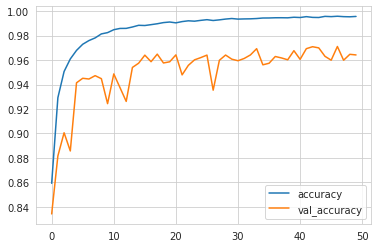

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()

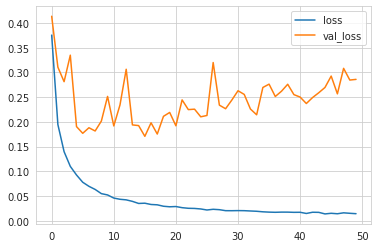

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()

**Classification Metrics**

In [ ]:
# We can get an understanding of how well the classification NN has done with the confusion matrix
# This plots True/False Negative/Positive in a table

# First we make our predictions
# This converts the predictions back into categorical form
predictions = model.predict(X_test).argmax(axis = 1)
predictions

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test.argmax(axis=1),predictions)

array([[17559,   318,   109,    90,    42],
       [   85,   457,     8,     5,     1],
       [   34,    17,  1367,    21,     9],
       [   10,     1,    13,   137,     1],
       [   14,     2,     3,     1,  1588]])

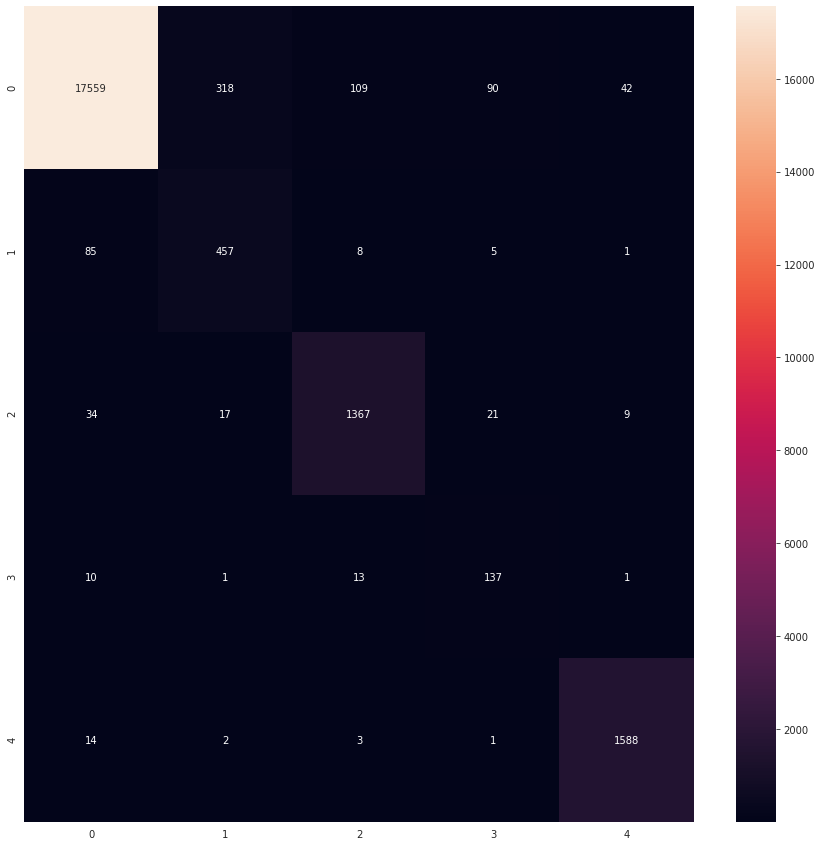

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(confusion_matrix(y_test.argmax(axis=1),predictions),annot = True, fmt = '0.0f')

In [ ]:
# We can get an idea of precision, recall and the f1-score
print(classification_report(y_test.argmax(axis=1),predictions))
# Need to print otherwise we get a bad display

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     18118
           1       0.57      0.82      0.68       556
           2       0.91      0.94      0.93      1448
           3       0.54      0.85      0.66       162
           4       0.97      0.99      0.98      1608

    accuracy                           0.96     21892
   macro avg       0.80      0.91      0.84     21892
weighted avg       0.97      0.96      0.97     21892



In [ ]:
# To make new predictions we use model.predict()

In [ ]:
# To show the weights we do model.weights
model.weights

[<tf.Variable 'dense/kernel:0' shape=(187, 64) dtype=float32, numpy=
 array([[ 0.34601325, -0.23514566, -0.23802121, ..., -0.96777827,
          0.05971143,  0.01782995],
        [ 0.11897954, -0.13003463,  0.5691886 , ..., -0.59099215,
          0.39694732,  0.44023857],
        [-1.2150811 ,  0.01933641, -0.15387405, ..., -0.3303865 ,
          0.4543392 ,  0.3667199 ],
        ...,
        [ 0.08422284, -0.23612097,  0.43670663, ..., -0.18188535,
         -0.054335  , -1.3267944 ],
        [ 0.22346337, -0.79401857,  0.1441353 , ..., -0.53415823,
         -0.18127869, -0.66454387],
        [-0.26090264, -0.8929936 ,  0.08824297, ..., -0.7373388 ,
         -0.09772483, -0.27987742]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(64,) dtype=float32, numpy=
 array([-0.15960145, -0.23578474, -0.22422412, -0.5960394 , -0.30107576,
         0.01720047,  0.12010577, -0.38412538,  0.08200579,  0.63941664,
         0.36810324, -0.3673355 , -0.25725302,  0.40879166, -0.4678807 ,
      